In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 과제1 - kernel크기 3,7,15에 대해 filtering시간 측정
- average filter 구현
- filtering구현(반드시 4중for문)

In [2]:
import cv2
import numpy as np
import time

def generate_average_filter(ksize):

    #########################################################
    # TODO                                                  #
    # average filter 구현
    #########################################################

    # 입력된 kernel 즉, filter size에 대해 모든 요소값을 np.ones를 이용해 1로 초기화.
    kernel = np.ones((ksize, ksize), dtype=np.float32)

    # 모든 요소 합계 구하기.
    kernel_sum = np.sum(kernel)

    # 총합을 각 element 요소에 나눠 평균을 계산.
    kernel = kernel / kernel_sum
    
    return kernel

def my_padding(src,ksize,pad_type ='zero'):

    # default - zero padding으로 셋팅
    (h,w) = src.shape
    (f_h, f_w) = ksize
    p_h = f_h // 2
    p_w = f_w // 2
    pad_img = np.zeros((h + p_h * 2, w + p_w * 2))
    pad_img[p_h:h + p_h, p_w : w + p_w] = src

    if pad_type == 'repetition':
        print('repetition padding')
        #up
        pad_img[:p_h, p_w:p_w + w] = src[0,:]

        #down
        pad_img[p_h + h:, p_w:p_w + w] = src[h-1,:]

        #left
        pad_img[:,:p_w] = pad_img[:,p_w:p_w + 1]

        #right
        pad_img[:,p_w + w :] = pad_img[:,p_w + w -1 : p_w + w]

    else:
        # else is zero padding
        print('zero padding')
    return pad_img

def my_filtering(image, kernel):

    h, w = image.shape
    k_h, k_w = kernel.shape[0], kernel.shape[1]
    pad_image = my_padding(image, (k_h, k_w))

    # filtering 계산을 위해 dst 타입을 float형으로 지정
    dst = np.zeros((h, w), dtype=np.float32)

    #########################################################
    # TODO                                                  #
    # Filtering 구현                                         #
    # dst : filtering 결과 image                             #
    # 유의미한 시간 측정을 위해 4중 for 문으로 구현 할 것
    # 교수님 이론 PPT 4page 수식 참고
    #########################################################
    
    for i in range(h):
        for j in range(w):
            for u in range(-k_h // 2, k_h // 2 + 1):
                for v in range(-k_w // 2, k_w // 2 + 1):
                    y, x = i + u + k_h // 2, j + v + k_w // 2
                    dst[i][j] += pad_image[y][x] * kernel[u + k_h // 2][v + k_w // 2]
                    
    
    # float32 -> uint8(unsigned int)로 변경
    dst = np.round(dst).astype(np.uint8)
    return dst


def measure_filtering_time(image, kernel):

    h, w = kernel.shape
    start = time.perf_counter()
    output = my_filtering(image, kernel)
    print('{} X {} Filter Time : {}'.format(h, w ,(time.perf_counter() - start)))

    return output


def compare_speed_filtering():

    src = cv2.imread('./Lena.png', cv2.IMREAD_GRAYSCALE)

    my_3x3_average_filter = generate_average_filter(ksize=3)
    my_7x7_average_filter = generate_average_filter(ksize=7)
    my_15x15_average_filter = generate_average_filter(ksize=15)

    output1 = measure_filtering_time(src, my_3x3_average_filter)
    output2 = measure_filtering_time(src, my_7x7_average_filter)
    output3 = measure_filtering_time(src, my_15x15_average_filter)


def main():

    compare_speed_filtering()

    return

if __name__ == "__main__":
    main()


zero padding
3 X 3 Filter Time : 4.448124686256051
zero padding
7 X 7 Filter Time : 16.49115386698395
zero padding
15 X 15 Filter Time : 65.52467430010438


In [4]:
src = cv2.imread('./Lena.png', cv2.IMREAD_GRAYSCALE)
h, w = src.shape

print('Image_size: ', w, 'X', h)

Image_size:  512 X 512


# 과제2

- Gaussian 1D 구현 및 다양한 값에 대한 그래프, filter시각화 이미지 (filtering함수는 2중for문으로 구현)
- Gaussian 2D 구현

### 1. Gaussian 1D 구현

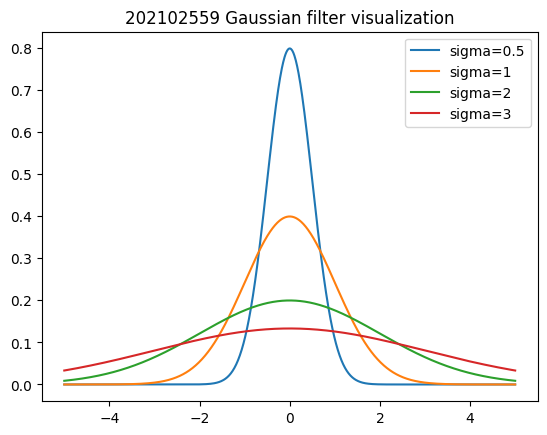

zero padding
zero padding


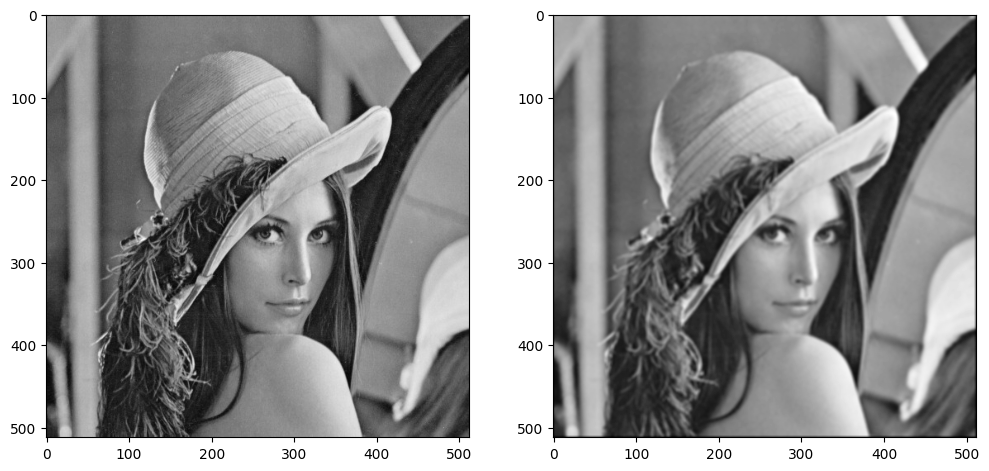

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def my_padding(src,mask,pad_type = 'zero'):

    # default - zero padding으로 셋팅
    (h,w) = src.shape
    (f_h, f_w) = mask.shape
    p_h = f_h // 2
    p_w = f_w // 2
    pad_img = np.zeros((h + p_h * 2, w + p_w * 2))
    pad_img[p_h:h + p_h, p_w : w + p_w] = src
    if pad_type == 'repetition':
        print('repetition padding')
        #up
        pad_img[:p_h, p_w:p_w + w] = src[0,:]

        #down
        pad_img[p_h + h:, p_w:p_w + w] = src[h-1,:]

        #left
        pad_img[:,:p_w] = pad_img[:,p_w:p_w + 1]

        #right
        pad_img[:,p_w + w :] = pad_img[:,p_w + w -1 : p_w + w]

    else:
        # else is zero padding
        print('zero padding')
    return pad_img


def my_filtering(src, mask, pad_type='zero'):
    (h, w) = src.shape
    (f_h, f_w) = mask.shape
    pad_img = my_padding(src, mask, pad_type)
    dst = np.zeros((h, w))

    #########################################
    # TODO 3. Filtering 2중 for문 구현
    #########################################

    for row in range(h):
        for col in range(w):
            
            # 패딩된 이미지에서 현재 위치의 영역을 가져옴
            curr = pad_img[row:row+f_h, col:col+f_w]
            # 마스크와 곱한 후 모든 값을 더함
            conv = (mask * curr).sum()
            # 계산된 값을 dst 이미지에 저장
            dst[row, col] = conv
            
    dst = np.round(dst).astype(np.uint8)
    return dst

def my_get_Gaussian_filter(fshape, sigma=1):

    (f_h, f_w) = fshape

    ############################################################################
    # TODO 2. 1D Gaussian으로 2번 Filtering
    # TODO gaussian_filter 식 채우기
    # TODO 참고) np.mgrid 사용하면 쉽게 구현 가능
    # TODO hint
    #     y, x = np.mgrid[-1:2, -1:2]
    #     y => [[-1,-1,-1],
    #           [ 0, 0, 0],
    #           [ 1, 1, 1]]
    #     x => [[-1, 0, 1],
    #           [-1, 0, 1],
    #           [-1, 0, 1]]
    ############################################################################
    if (f_h == 1):
        x = np.linspace(-1, 1, f_w)
        x = np.exp(-(x**2)/(2*(sigma**2)))
        gaussian_filter = x.reshape(1, -1)


    elif (f_w == 1):
        y = np.linspace(-1, 1, f_h)
        y = np.exp(-(y**2)/(2*(sigma**2)))
        gaussian_filter = y.reshape(-1, 1)

    # mask 총합 1 : 평균 밝기의 변화가 없도록 하기 위함
    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)
    return gaussian_filter



def my_gaussian_filter(src, fshape, sigma=15, verbose=False):

    (h, w) = src.shape
    if verbose:
        print('Gaussian filtering')

    filter = my_get_Gaussian_filter(fshape, sigma=sigma)

    if verbose:
        print('<Gaussian filter> - shape:', fshape, '-sigma:', sigma)
        print(filter)

    dst = my_filtering(src, filter)
    return dst, filter


if __name__ == '__main__':


    src = cv2.imread('./Lena.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

    # 사용중인 필터를 확인하고 싶으면 True로 변경, 보기 싫으면 False로 변경
    verbose = False

    ############################################################################
    # TODO 1. sigma 변화에 따른 1D Gaussian filter 시각화
    # TODO gaussian_filter 식 채우기 및 그래프 그리기
    # TODO 교수님 이론 PPT 40 page 참고
    ############################################################################
    x = np.linspace(-5, 5, 1000)
    mean = x.mean()
    
    sigma1 = 0.5
    gaussian_filter1 = (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * sigma1 ** 2))

    sigma2 = 1
    gaussian_filter2 = (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * sigma2 ** 2))

    sigma3 = 2
    gaussian_filter3 = (1 / (sigma3 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * sigma3 ** 2))

    sigma4 = 3
    gaussian_filter4 = (1 / (sigma4 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * sigma4 ** 2))

    plt.title('202102559 Gaussian filter visualization')
    plt.plot(x, gaussian_filter1, label='sigma=0.5')
    plt.plot(x, gaussian_filter2, label='sigma=1')
    plt.plot(x, gaussian_filter3, label='sigma=2')
    plt.plot(x, gaussian_filter4, label='sigma=3')
    plt.legend()
    plt.show()

    ############################################################################
    # TODO 2. 1D Gaussian으로 2번 Filtering
    # TODO gaussian_filter 식 채우기
    ############################################################################
    filter_size = 5
    sigma = 1
    dst_gaussian_1D, _ = my_gaussian_filter(src, (filter_size, 1), sigma=sigma,
                                         verbose=verbose)
    
    dst_gaussian_1D, _ = my_gaussian_filter(dst_gaussian_1D, (1, filter_size), sigma=sigma,
                                         verbose=verbose)

    dst_gaussian_1D = np.round(dst_gaussian_1D).astype(np.uint8)

    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
    axs[0].imshow(src.astype(np.uint8), cmap='gray')
    axs[1].imshow(dst_gaussian_1D, cmap='gray')

## 과제 2-2
### Gaussian filtering 분석 
##### 6가지경우상세내용
- ksize=5x5    sigma=1
- ksize=5x5    sigma=3
- ksize=5x5    sigma=0.1 
- ksize=7x7    sigma=3
- ksize=11x11  sigma=3 
- ksize=15x15  sigma=3

zero padding


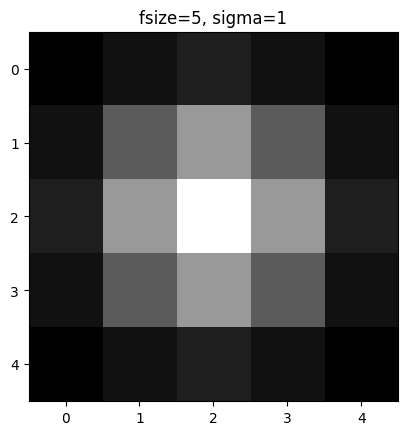

zero padding


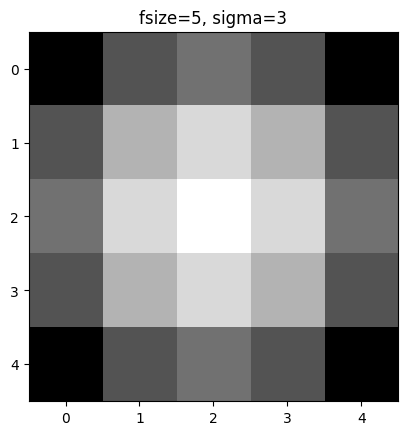

zero padding


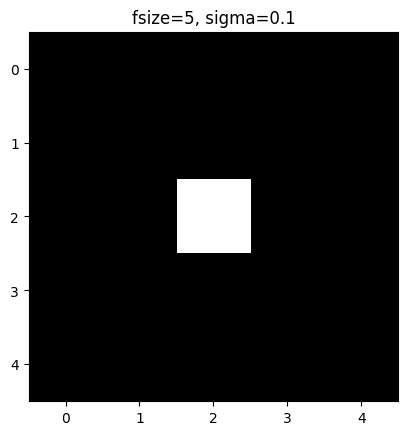

zero padding


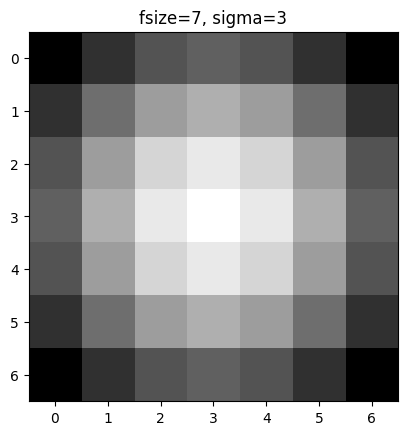

zero padding


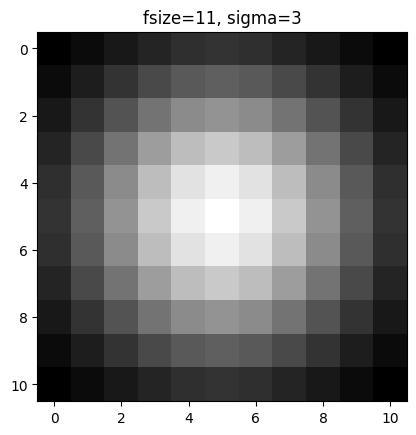

zero padding


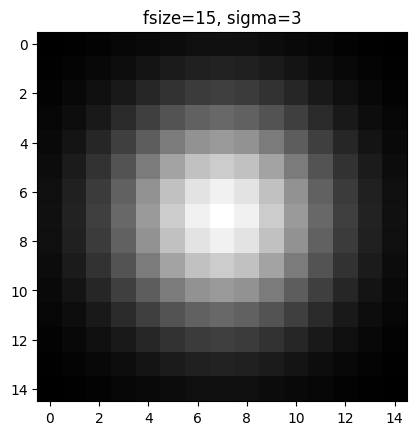

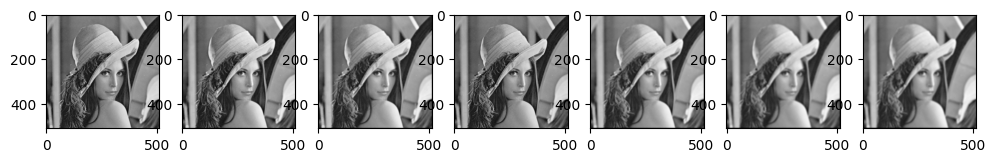

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


def my_padding(src,mask,pad_type = 'zero'):

    # default - zero padding으로 셋팅
    (h,w) = src.shape
    (f_h, f_w) = mask.shape
    p_h = f_h // 2
    p_w = f_w // 2
    pad_img = np.zeros((h + p_h * 2, w + p_w * 2))
    pad_img[p_h:h + p_h, p_w : w + p_w] = src
    if pad_type == 'repetition':
        print('repetition padding')
        #up
        pad_img[:p_h, p_w:p_w + w] = src[0,:]

        #down
        pad_img[p_h + h:, p_w:p_w + w] = src[h-1,:]

        #left
        pad_img[:,:p_w] = pad_img[:,p_w:p_w + 1]

        #right
        pad_img[:,p_w + w :] = pad_img[:,p_w + w -1 : p_w + w]

    else:
        # else is zero padding
        print('zero padding')
    return pad_img


def my_filtering(src, mask, pad_type='zero'):
    (h, w) = src.shape
    (f_h, f_w) = mask.shape
    pad_img = my_padding(src, mask, pad_type)
    dst = np.zeros((h, w))

    #########################################
    # TODO 3. Filtering 2중 for문 구현
    #########################################

    for row in range(h):
        for col in range(w):
            
            # 패딩된 이미지에서 현재 위치의 영역을 가져옴
            curr = pad_img[row:row+f_h, col:col+f_w]
            # 마스크와 곱한 후 모든 값을 더함
            conv = (mask * curr).sum()
            # 계산된 값을 dst 이미지에 저장
            dst[row, col] = conv
            
    dst = np.round(dst).astype(np.uint8)
    return dst


def my_get_Gaussian_filter(fshape, sigma=1):

    (f_h, f_w) = fshape
    ############################################################################
    # TODO 2 2D Gaussian filter 구현
    # TODO 2 np.mrid를 사용하면 y, x 모두 구할 수 있음
    # TODO hint
    #     y, x = np.mgrid[-1:2, -1:2]
    
    #     y => [[-1,-1,-1],
    #           [ 0, 0, 0],
    #           [ 1, 1, 1]]
    
    #     x => [[-1, 0, 1],
    #           [-1, 0, 1],
    #           [-1, 0, 1]]
    ############################################################################

    y, x = np.mgrid[-(f_h // 2):f_h // 2 + 1, -(f_w // 2):f_w // 2 + 1]

    # 2차 gaussian mask 생성
    gaussian_filter = np.exp(-((x ** 2 + y ** 2) / (2.0 * sigma ** 2)))

    # mask 총합 1 : 평균 밝기의 변화가 없도록 하기 위함
    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)
    return gaussian_filter


def my_gaussian_filter(src, fshape, sigma=15, verbose=False):
    (h, w) = src.shape
    if verbose:
        print('Gaussian filtering')

    filter = my_get_Gaussian_filter(fshape, sigma=sigma)

    if verbose:
        print('<Gaussian filter> - shape:', fshape, '-sigma:', sigma)
        print(filter)

    dst = my_filtering(src, filter)
    return dst, filter


if __name__ == '__main__':

    src = cv2.imread('./Lena.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

    ##################################################################################
    # TODO 1 kernel 크기와 sigma 변화에 따른 2D Gaussian filter 분석
    # TODO filter_size sigma 변수를 다음과 같이 5가지 경우로 나누어서 결과 이미지 및 필터 시각화 결과 확인
    # TODO 보고서에는 6가지 경우에 대한 결과들의 분석 내용이 있어야함
    ##################################################################################
    verbose = False

    # Case1
    filter_size = 5
    sigma = 1
    dst_gaussian_2D_1, filter1 = my_gaussian_filter(src, (filter_size, filter_size),
                                                    sigma=sigma, verbose=verbose)

    # 필터 시각화 확인
    filter1 = ((filter1 - filter1.min()) / (filter1.max() - filter1.min())) * 255
    filter1 = np.clip(filter1, 0, 255)
    filter1 = np.round(filter1).astype(np.uint8)

    plt.title('fsize=5, sigma=1')
    plt.imshow(filter1, cmap='gray')
    plt.show()

    dst_gaussian_2D_1 = np.round(dst_gaussian_2D_1).astype(np.uint8)

    # Case2
    filter_size = 5
    sigma = 3
    dst_gaussian_2D_2, filter2 = my_gaussian_filter(src, (filter_size, filter_size),
                                           sigma=sigma, verbose=verbose)
    dst_gaussian_2D_2 = np.round(dst_gaussian_2D_2).astype(np.uint8)

    # 필터 시각화 확인
    filter2 = ((filter2 - filter2.min()) / (filter2.max() - filter2.min())) * 255
    filter2 = np.clip(filter2, 0, 255)
    filter2 = np.round(filter2).astype(np.uint8)

    plt.title('fsize=5, sigma=3')
    plt.imshow(filter2, cmap='gray')
    plt.show()

    # Case3
    filter_size = 5
    sigma = 0.1
    dst_gaussian_2D_3, filter3 = my_gaussian_filter(src, (filter_size, filter_size),
                                           sigma=sigma, verbose=verbose)
    dst_gaussian_2D_3 = np.round(dst_gaussian_2D_3).astype(np.uint8)

    # 필터 시각화 확인
    filter3 = ((filter3 - filter3.min()) / (filter3.max() - filter3.min())) * 255
    filter3 = np.clip(filter3, 0, 255)
    filter3 = np.round(filter3).astype(np.uint8)

    plt.title('fsize=5, sigma=0.1')
    plt.imshow(filter3, cmap='gray')
    plt.show()

    # Case4
    filter_size = 7
    sigma = 3
    dst_gaussian_2D_4, filter4 = my_gaussian_filter(src, (filter_size, filter_size),
                                           sigma=sigma, verbose=verbose)
    dst_gaussian_2D_4 = np.round(dst_gaussian_2D_4).astype(np.uint8)

    # 필터 시각화 확인
    filter4 = ((filter4 - filter4.min()) / (filter4.max() - filter4.min())) * 255
    filter4 = np.clip(filter4, 0, 255)
    filter4 = np.round(filter4).astype(np.uint8)

    plt.title('fsize=7, sigma=3')
    plt.imshow(filter4, cmap='gray')
    plt.show()

    # Case5
    filter_size = 11
    sigma = 3
    dst_gaussian_2D_5, filter5 = my_gaussian_filter(src, (filter_size, filter_size),
                                           sigma=sigma, verbose=verbose)
    dst_gaussian_2D_5 = np.round(dst_gaussian_2D_5).astype(np.uint8)

    # 필터 시각화 확인
    filter5 = ((filter5 - filter5.min()) / (filter5.max() - filter5.min())) * 255
    filter5 = np.clip(filter5, 0, 255)
    filter5 = np.round(filter5).astype(np.uint8)

    plt.title('fsize=11, sigma=3')
    plt.imshow(filter5, cmap='gray')
    plt.show()

    # Case6
    filter_size = 15
    sigma = 3
    dst_gaussian_2D_6, filter6 = my_gaussian_filter(src, (filter_size, filter_size),
                                           sigma=sigma, verbose=verbose)
    dst_gaussian_2D_6 = np.round(dst_gaussian_2D_6).astype(np.uint8)

    # 필터 시각화 확인
    filter6 = ((filter6 - filter6.min()) / (filter6.max() - filter6.min())) * 255
    filter6 = np.clip(filter6, 0, 255)
    filter6 = np.round(filter6).astype(np.uint8)

    plt.title('fsize=15, sigma=3')
    plt.imshow(filter6, cmap='gray')
    plt.show()

    
    fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(12,12))
    axs[0].imshow(src.astype(np.uint8), cmap='gray')
    axs[1].imshow(dst_gaussian_2D_1, cmap='gray')
    axs[2].imshow(dst_gaussian_2D_2, cmap='gray')
    axs[3].imshow(dst_gaussian_2D_3, cmap='gray')
    axs[4].imshow(dst_gaussian_2D_4, cmap='gray')
    axs[5].imshow(dst_gaussian_2D_5, cmap='gray')
    axs[6].imshow(dst_gaussian_2D_5, cmap='gray')


    # 보고서 첨부용 결과 이미지
    cv2.imwrite('Case1.png',dst_gaussian_2D_1)
    cv2.imwrite('Case2.png',dst_gaussian_2D_2)
    cv2.imwrite('Case3.png',dst_gaussian_2D_3)
    cv2.imwrite('Case4.png',dst_gaussian_2D_4)
    cv2.imwrite('Case5.png',dst_gaussian_2D_5)
    cv2.imwrite('Case6.png',dst_gaussian_2D_6)